In [152]:
#Data processing packages
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 100)
 
#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
 
#NLP packages
from textblob import TextBlob
 
import warnings
warnings.filterwarnings("ignore")

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [153]:
#Importing comments
data = pd.read_excel('Text data from Buzz_Jun20.xlsx')

In [154]:
df = pd.read_excel('Text data from Buzz_Jun20.xlsx')
df.drop(columns=['Product_URL'], inplace=True)
df.drop(columns=['Review_Link'], inplace=True)
df.head()

,Rev_id,Retailer,Division,Category,Department,Brand,Product_Name,Final_Price_after_Discount,Review_Header,Review_Creation_Date,Review_Rating_Score,Review_Text
0,1,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan with Light Kit,69.97,Excellent fan for an excellent price ...,2018-04-24,5,Excellent fan for an excellent price
1,2,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan with Light Kit,69.97,I put these fans in my spec houses and everyone...,2019-10-15,5,I put these fans in my spec houses and everyone likes them. I like the price and the value. Bu...
2,3,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan with Light Kit,69.97,5 Star Review,2019-07-03,5,Rating provided by a verified purchaser
3,4,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan with Light Kit,69.97,"Easy to put together, our 3rd purchase for this...",2019-01-17,5,"Easy to put together, our 3rd purchase for this brand so we now have 3 rooms with this fan and ..."
4,5,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan with Light Kit,69.97,This fan it was easily to install and it is...,2019-02-09,5,This fan it was easily to install and it is a beautiful model.


In [155]:
print(df.keys())
df.shape

Index(['Rev_id', 'Retailer', 'Division', 'Category', 'Department', 'Brand',
       'Product_Name', 'Final_Price_after_Discount', 'Review_Header',
       'Review_Creation_Date', 'Review_Rating_Score', 'Review_Text'],
      dtype='object')


(1188, 12)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Rev_id                      1188 non-null   int64         
 1   Retailer                    1188 non-null   object        
 2   Division                    1188 non-null   object        
 3   Category                    1188 non-null   object        
 4   Department                  1188 non-null   object        
 5   Brand                       1188 non-null   object        
 6   Product_Name                1188 non-null   object        
 7   Final_Price_after_Discount  1188 non-null   float64       
 8   Review_Header               1162 non-null   object        
 9   Review_Creation_Date        1188 non-null   datetime64[ns]
 10  Review_Rating_Score         1188 non-null   int64         
 11  Review_Text                 1188 non-null   object      

In [157]:
df.describe()

,Rev_id,Final_Price_after_Discount,Review_Rating_Score
count,1188.000000,1188.000000,1188.000000
mean,594.500000,126.142315,4.251684
std,343.090367,82.972227,1.252377
min,1.000000,29.970000,1.000000
25%,297.750000,49.980000,4.000000
50%,594.500000,99.980000,5.000000
75%,891.250000,174.000000,5.000000
max,1188.000000,299.980000,5.000000


In [158]:
df.Review_Rating_Score.value_counts()

5    766
4    206
1    101
3     66
2     49
Name: Review_Rating_Score, dtype: int64

In [159]:
df.Brand.value_counts()

Harbor Breeze                   378
Home Decorators Collection      286
Fanimation Studio Collection    149
Hunter                          123
Local Brand                     120
Hampton Bay                     104
Kichler                          28
Name: Brand, dtype: int64

In [160]:
df.Product_Name.value_counts()

Hugger 52 in. LED Indoor Brushed Nickel Ceiling Fan with Light Kit                                                                                                                  76
Harbor Breeze Armitage 52-in Brushed Nickel LED Indoor Flush Mount Ceiling Fan with Light Kit (5-Blade)                                                                             63
Fanimation Studio Collection Slinger v2 72-in Matte Black LED Indoor/Outdoor Ceiling Fan with Light Kit and Remote (9-Blade)                                                        52
Fanimation Studio Collection Slinger v2 72-in Brushed Nickel LED Indoor/Outdoor Commercial/Residential Ceiling Fan with Light Kit Included and Remote Control Included (9-Blade)    49
Harbor Breeze Armitage 52-in Bronze LED Indoor Flush Mount Ceiling Fan with Light Kit (5-Blade)                                                                                     37
                                                                                     

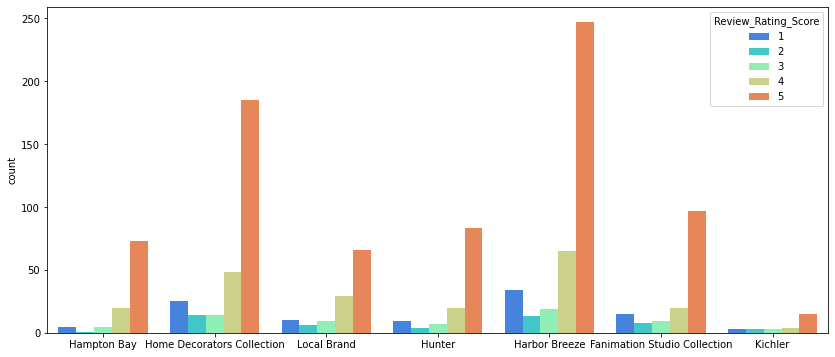

In [161]:
plt.figure(figsize =(14, 6))
sns.countplot(x='Brand', data=df, palette='rainbow', hue='Review_Rating_Score')
plt.xlabel('')
plt.show()

In [162]:
from wordcloud import WordCloud

def wc(data,bgcolor,title):
    plt.figure(figsize = (20,30))
    wc = WordCloud(background_color = bgcolor, max_words = 600, random_state=None, max_font_size = 30)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [163]:
#Displaying the first 5 rows of the data
data.head()

,Rev_id,Retailer,Division,Category,Department,Product_URL,Brand,Product_Name,Final_Price_after_Discount,Review_Link,Review_Header,Review_Creation_Date,Review_Rating_Score,Review_Text
0,1,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockport-52-in-LED-Brushed-Nickel-Ceiling-Fan-with-Light...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan with Light Kit,69.97,https://www.homedepot.com/ReviewServices/reviews/v1/product/301136112?key=x5w9jA8tWVGcqRhujrHTvj...,Excellent fan for an excellent price ...,2018-04-24,5,Excellent fan for an excellent price
1,2,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockport-52-in-LED-Brushed-Nickel-Ceiling-Fan-with-Light...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan with Light Kit,69.97,https://www.homedepot.com/ReviewServices/reviews/v1/product/301136112?key=x5w9jA8tWVGcqRhujrHTvj...,I put these fans in my spec houses and everyone...,2019-10-15,5,I put these fans in my spec houses and everyone likes them. I like the price and the value. Bu...
2,3,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockport-52-in-LED-Brushed-Nickel-Ceiling-Fan-with-Light...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan with Light Kit,69.97,https://www.homedepot.com/ReviewServices/reviews/v1/product/301136112?key=x5w9jA8tWVGcqRhujrHTvj...,5 Star Review,2019-07-03,5,Rating provided by a verified purchaser
3,4,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockport-52-in-LED-Brushed-Nickel-Ceiling-Fan-with-Light...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan with Light Kit,69.97,https://www.homedepot.com/ReviewServices/reviews/v1/product/301136112?key=x5w9jA8tWVGcqRhujrHTvj...,"Easy to put together, our 3rd purchase for this...",2019-01-17,5,"Easy to put together, our 3rd purchase for this brand so we now have 3 rooms with this fan and ..."
4,5,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockport-52-in-LED-Brushed-Nickel-Ceiling-Fan-with-Light...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan with Light Kit,69.97,https://www.homedepot.com/ReviewServices/reviews/v1/product/301136112?key=x5w9jA8tWVGcqRhujrHTvj...,This fan it was easily to install and it is...,2019-02-09,5,This fan it was easily to install and it is a beautiful model.


In [164]:
#Finding the size of the data
data.shape

(1188, 14)

In [165]:
#Extracting all random samples from the data
comm = data.sample(1188)
comm.shape

(1188, 14)

In [166]:
#Calculating the Sentiment Polarity and Subjectivity
polarity=[] # list which will contain the polarity of the comments
subjectivity=[] # list which will contain the subjectivity of the comments
for i in comm['Review_Text'].values:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
        
    except:
        polarity.append(0)
        subjectivity.append(0)

In [167]:
#Adding the Sentiment Polarity column to the data
comm['polarity']=polarity
comm['subjectivity']=subjectivity

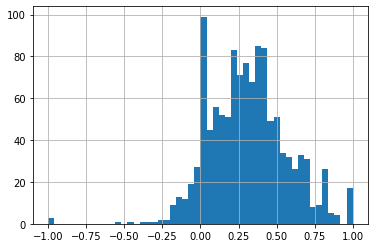

In [168]:
comm.polarity.hist(bins=50)

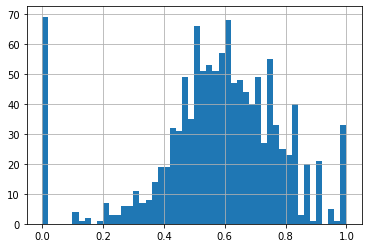

In [169]:
comm.subjectivity.hist(bins=50)

In [170]:
#Displaying the POSITIVE comments
df_positive = comm[comm.polarity==1]
df_positive[['Product_Name','Review_Header','Review_Text']].head(10)

,Product_Name,Review_Header,Review_Text
166,Channing 54 in. LED Indoor Easy Install Noble Bronze Ceiling Fan with HunterExpress feature set,This fan is AWESOME!! Will def buy again!,This fan is AWESOME!! Will def buy again!
359,Rockport 52 in. LED Oil Rubbed Bronze Ceiling Fan with Light Kit,Looks and works great!...,Looks and works great!
231,Antero 46 in. LED Indoor Brushed Nickel Ceiling Fan with Light,Very Happy with Fan...,Very Happy with Fan
581,Middleton 42 in. LED Indoor Brushed Nickel Ceiling Fan with Light Kit,Great price and works well!,Great price and works well!
715,Harbor Breeze Barnstaple Bay 52-in White Indoor Ceiling Fan with Light Kit (5-Blade),"""excellent""",this was an excellent buy for the quality and price....wowwwwwww
289,Mercer 52 in. LED Indoor Brushed Nickel Ceiling Fan with Light Kit and Remote Control,Excellent fan! Moves a lot of air!...,Excellent fan! Moves a lot of air!
200,Oakhurst 52 in. LED Indoor Low Profile New Bronze Ceiling Fan with Light Kit,A beautiful fan!,A beautiful fan!
95,Hugger 52 in. LED Indoor Brushed Nickel Ceiling Fan with Light Kit,I lie the style of the fan and it performs...,I lie the style of the fan and it performs well. price was great!!
83,Hugger 52 in. LED Indoor Brushed Nickel Ceiling Fan with Light Kit,Great fan for the price!,Great fan for the price!
155,Glendale 52 in. LED Indoor Brushed Nickel Ceiling Fan with Light Kit,Excellent look and performance,Excellent look and performance


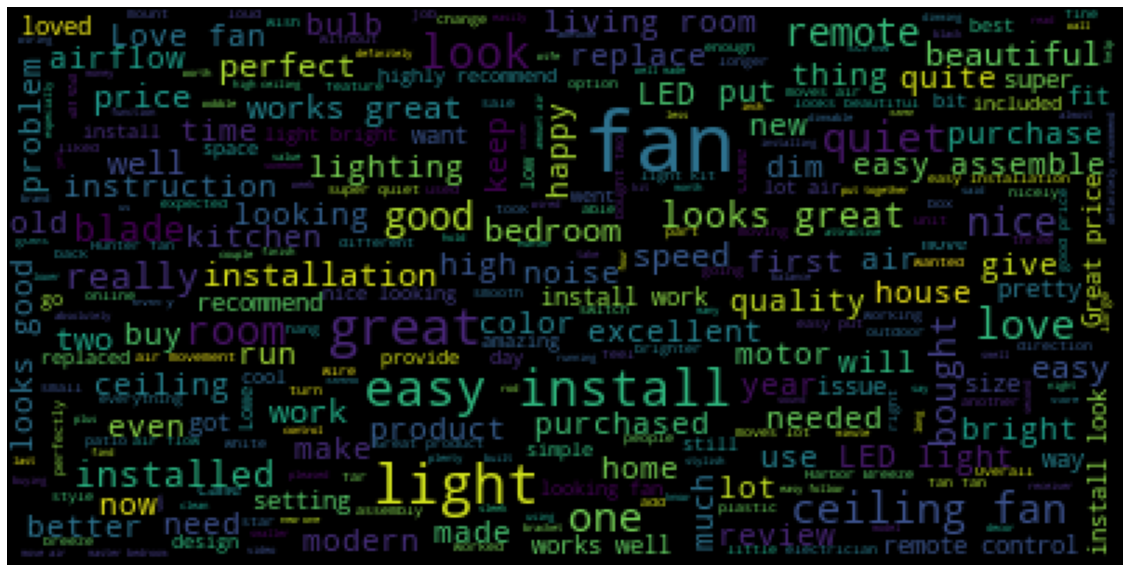

In [171]:
wc(comm['Review_Text'][comm.polarity>0.20],'black','Common Words' )

In [172]:
#Displaying the NEGATIVE comments
df_positive = comm[comm.polarity==-1]
df_positive[['Product_Name','Review_Header','Review_Text']].head(10)

,Product_Name,Review_Header,Review_Text
378,Rockport 52 in. LED Oil Rubbed Bronze Ceiling Fan with Light Kit,It shakes terribly. ...,It shakes terribly.
1113,Harbor Breeze Sail Stream 52-in Brushed Nickel LED Indoor Flush Mount Ceiling Fan with Light Kit...,"""This is a horrible product the fan stopped working""",This is a horrible product the fan stopped working three weeks after I installed itI spoke to cu...


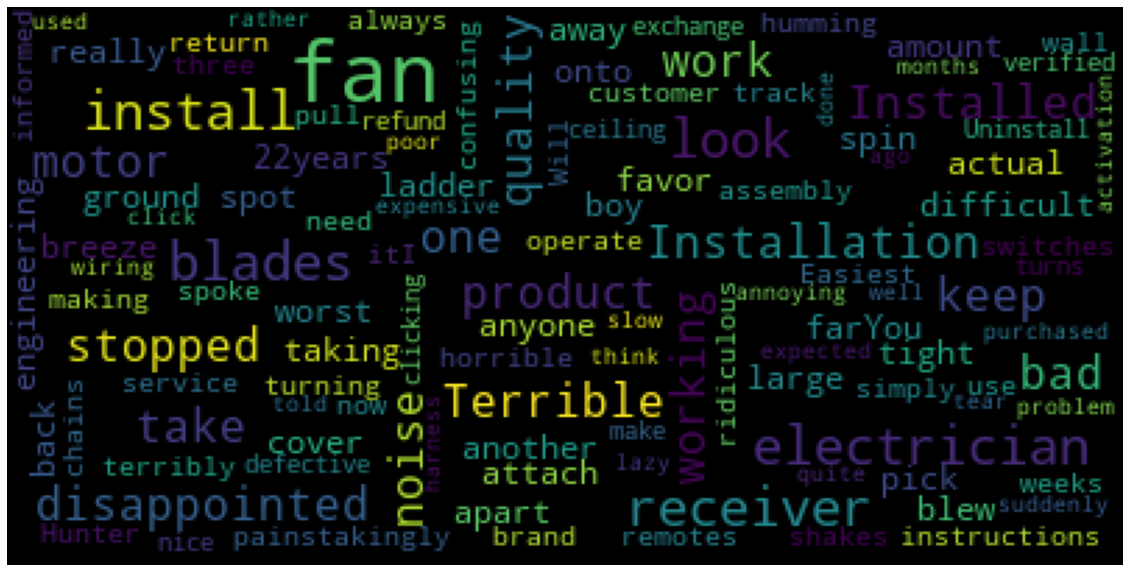

In [173]:
wc(comm['Review_Text'][comm.polarity<-0.2],'black','Common Words' )

In [174]:
#Displaying the NEUTRAL comments
df_positive = comm[comm.polarity==0]
df_positive[['Product_Name','Review_Header','Review_Text']].head(10)

,Product_Name,Review_Header,Review_Text
276,Clarkston II 44 in. LED Indoor Brushed Nickel Ceiling Fan with Light Kit,Rating provided by a verified purchaser...,Rating provided by a verified purchaser
565,Merwry 52 in. Integrated LED Indoor Brushed Nickel Ceiling Fan with Light Kit and Remote Control,The unit can not be flush mounted. ...,The unit can not be flush mounted.
375,Rockport 52 in. LED Oil Rubbed Bronze Ceiling Fan with Light Kit,5 Star Review,Rating provided by a verified purchaser
441,Kensgrove 54 in. Integrated LED Indoor Espresso Bronze Ceiling Fan with Light Kit and Remote Con...,4 Star Review,Rating provided by a verified purchaser
393,Palm Cove 52 in. LED Indoor/Outdoor Natural Iron Ceiling Fan with Light Kit,pro installed it for me...,pro installed it for me
167,Channing 54 in. LED Indoor Easy Install Noble Bronze Ceiling Fan with HunterExpress feature set,5 Star Review,Rating provided by a verified purchaser
1135,Harbor Breeze Beach Creek 44-in Brushed Nickel LED Indoor Ceiling Fan with Light Kit and Remote ...,"""good quality celing fan""",price at just over $100 this fan has both style and quality.easy to install but still takes two ...
2,Rockport 52 in. LED Brushed Nickel Ceiling Fan with Light Kit,5 Star Review,Rating provided by a verified purchaser
171,Channing 54 in. LED Indoor Easy Install Noble Bronze Ceiling Fan with HunterExpress feature set,One of the quietest and easiest fans to install...,One of the quietest and easiest fans to install
282,Mercer 52 in. LED Indoor Brushed Nickel Ceiling Fan with Light Kit and Remote Control,5 Star Review,Rating provided by a verified purchaser


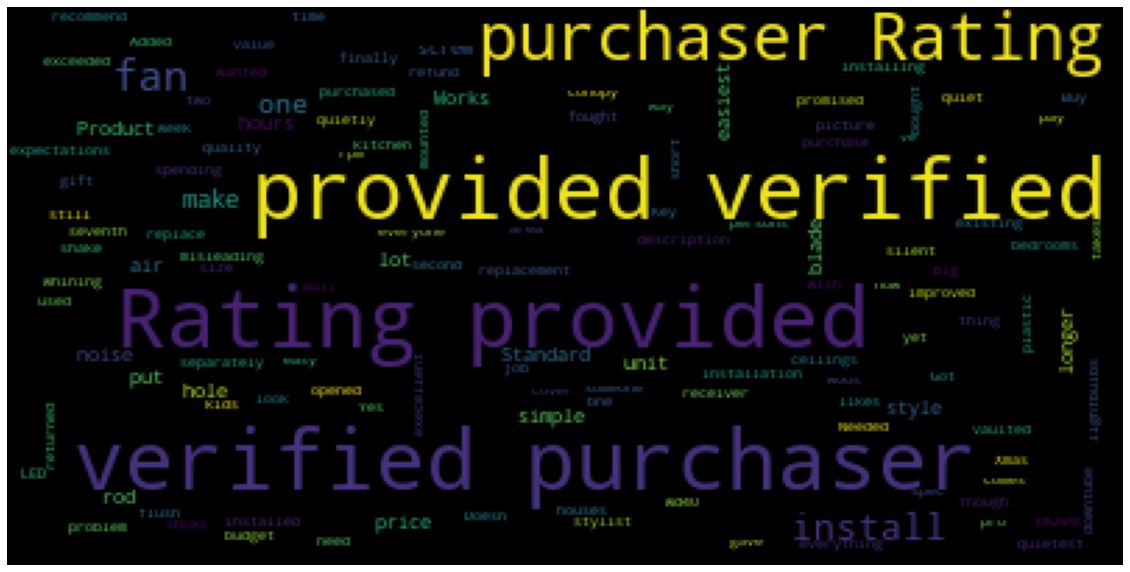

In [175]:
wc(comm['Review_Text'][comm.polarity == 0.0],'black','Common Words' )

In [177]:
#Converting the polarity values from continuous to categorical
comm['polarity'][comm.polarity==0]= 0
comm['polarity'][comm.polarity > 0]= 1
comm['polarity'][comm.polarity < 0]= -1

 1.0    1018
-1.0      92
 0.0      78
Name: polarity, dtype: int64

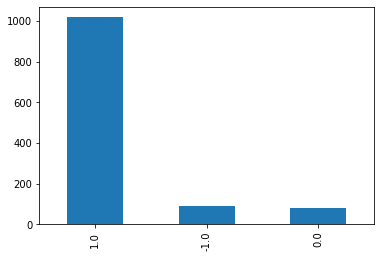

In [178]:
comm.polarity.value_counts().plot.bar()
comm.polarity.value_counts()

In [182]:
print("Summary statistics of numerical features : \n", data.describe())
print("\nTotal number of reviews: ",len(data))
print("\nTotal number of brands: ", len(list(set(data['Brand']))))
print("\nTotal number of unique products: ", len(list(set(data['Product_Name']))))
print("\nPercentage of reviews with neutral sentiment : {:.2f}%"\
      .format(data[data['Review_Rating_Score']==3]["Review_Rating_Score"].count()/len(data)*100))
print("\nPercentage of reviews with positive sentiment : {:.2f}%"\
      .format(data[data['Review_Rating_Score']>3]["Review_Rating_Score"].count()/len(data)*100))
print("\nPercentage of reviews with negative sentiment : {:.2f}%"\
      .format(data[data['Review_Rating_Score']<3]["Review_Rating_Score"].count()/len(data)*100))

Summary statistics of numerical features : 
             Rev_id  Final_Price_after_Discount  Review_Rating_Score
count  1188.000000                 1188.000000          1188.000000
mean    594.500000                  126.142315             4.251684
std     343.090367                   82.972227             1.252377
min       1.000000                   29.970000             1.000000
25%     297.750000                   49.980000             4.000000
50%     594.500000                   99.980000             5.000000
75%     891.250000                  174.000000             5.000000
max    1188.000000                  299.980000             5.000000

Total number of reviews:  1188

Total number of brands:  7

Total number of unique products:  79

Percentage of reviews with neutral sentiment : 5.56%

Percentage of reviews with positive sentiment : 81.82%

Percentage of reviews with negative sentiment : 12.63%
